In [23]:
# Phase 1: Data Collection and Preparation

import pandas as pd
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Phase 3: Data Preprocessing

import pandas as pd
from sklearn.preprocessing import StandardScaler

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [2]:

# Task 1.1 & 1.2: Load the dataset
df = pd.read_csv("C:\\Users\\USER\Desktop\\Testing\\ML_work\\Diabetes\\diabetes_dataset.csv")
print("✅ Dataset loaded successfully")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())


✅ Dataset loaded successfully
Shape: (442, 11)
Columns: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [3]:

# Task 1.3: Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [4]:
# Fill missing values with median (if any)
df = df.fillna(df.median())
print("✅ Missing values handled (filled with median)")


✅ Missing values handled (filled with median)


In [5]:

# Task 1.4: Clean the data
# Remove duplicate rows
df = df.drop_duplicates()
print("✅ Duplicates removed")

✅ Duplicates removed


In [6]:
# Convert all columns to numeric (if needed)
df = df.apply(pd.to_numeric, errors='coerce')

# Fill any new missing values after conversion
df = df.fillna(df.median())


In [7]:

# Final check
print("\nCleaned dataset shape:", df.shape)
print("Target column summary:")
print(df["target"].describe())

# Save clean copy for next phase
df_clean = df.copy()



Cleaned dataset shape: (442, 11)
Target column summary:
count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64


In [8]:
# Phase 2: Exploratory Data Analysis

# Use the cleaned dataset from Phase 1
df = df_clean.copy()

In [9]:

# Task 2.1: Distribution of features and target
print("Summary statistics:")
print(df.describe())


Summary statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -7.284269e-18  2.348549e-17 -2.087320e-16 -4.571507e-17 -9.293722e-18   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   4.420798e-17  2.135044e-18  2.913707e-17  9.143013e-17  1.431736e-17   
std    4.761905e-02  4.761905e-

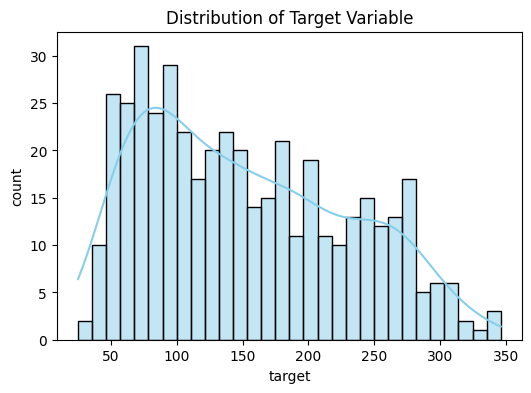

In [12]:

# Plot distribution of target
plt.figure(figsize=(6, 4))
sns.histplot(df["target"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Target Variable")
plt.xlabel("target")
plt.ylabel("count")
plt.show()

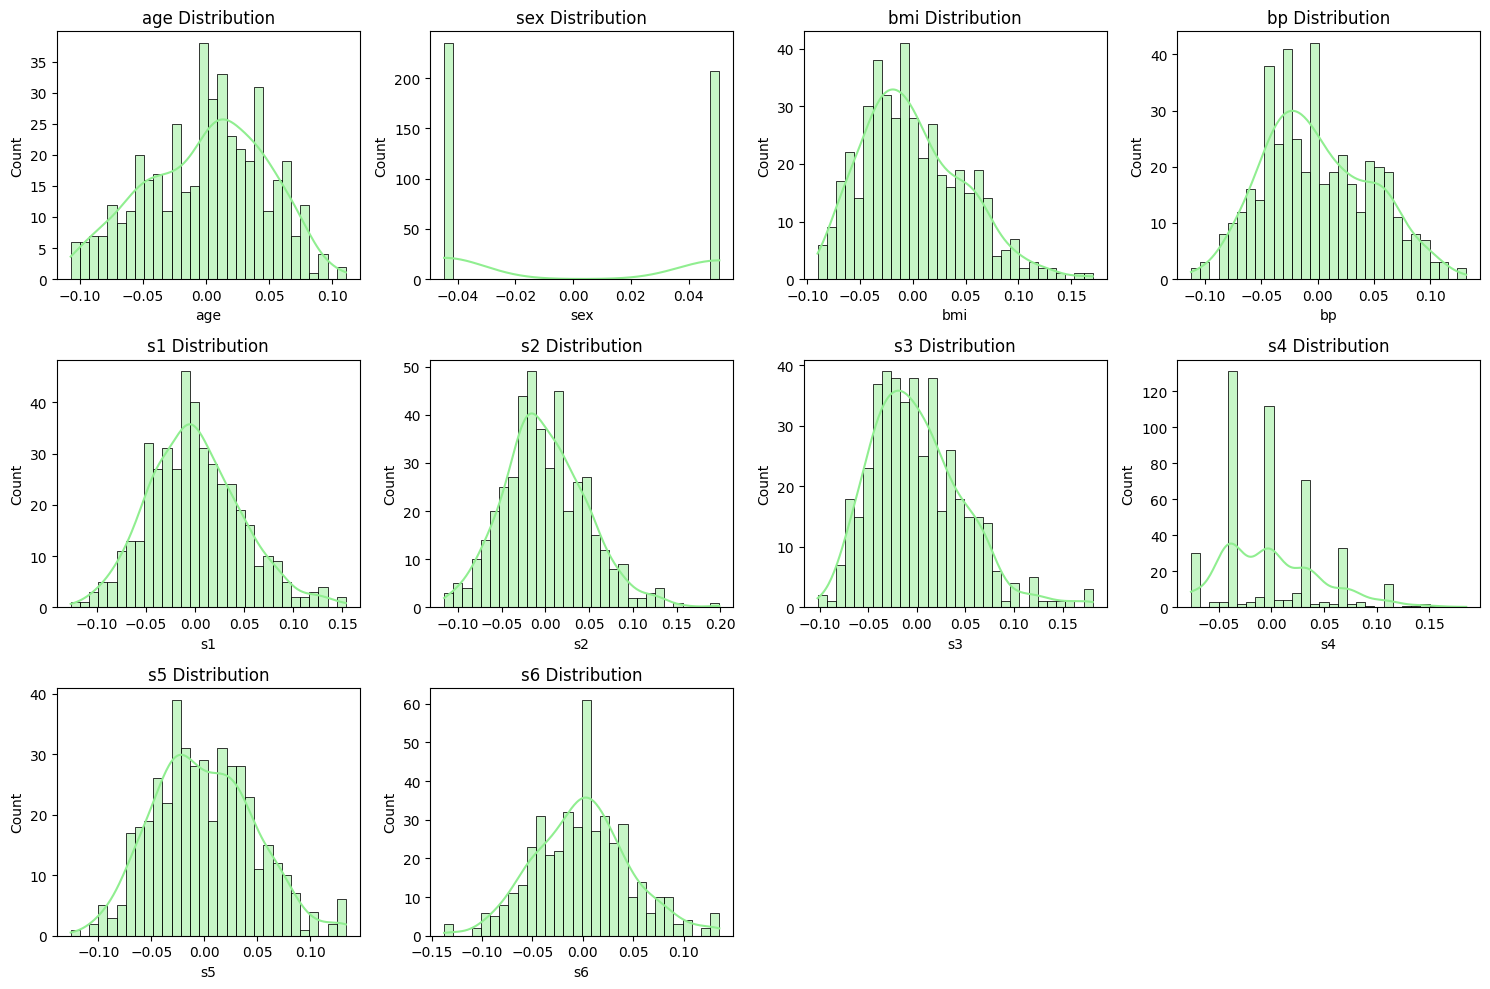

In [13]:


# Plot distributions of all features
feature_cols = [col for col in df.columns if col != "target"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(feature_cols):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], bins=30, kde=True, color="lightgreen")
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()

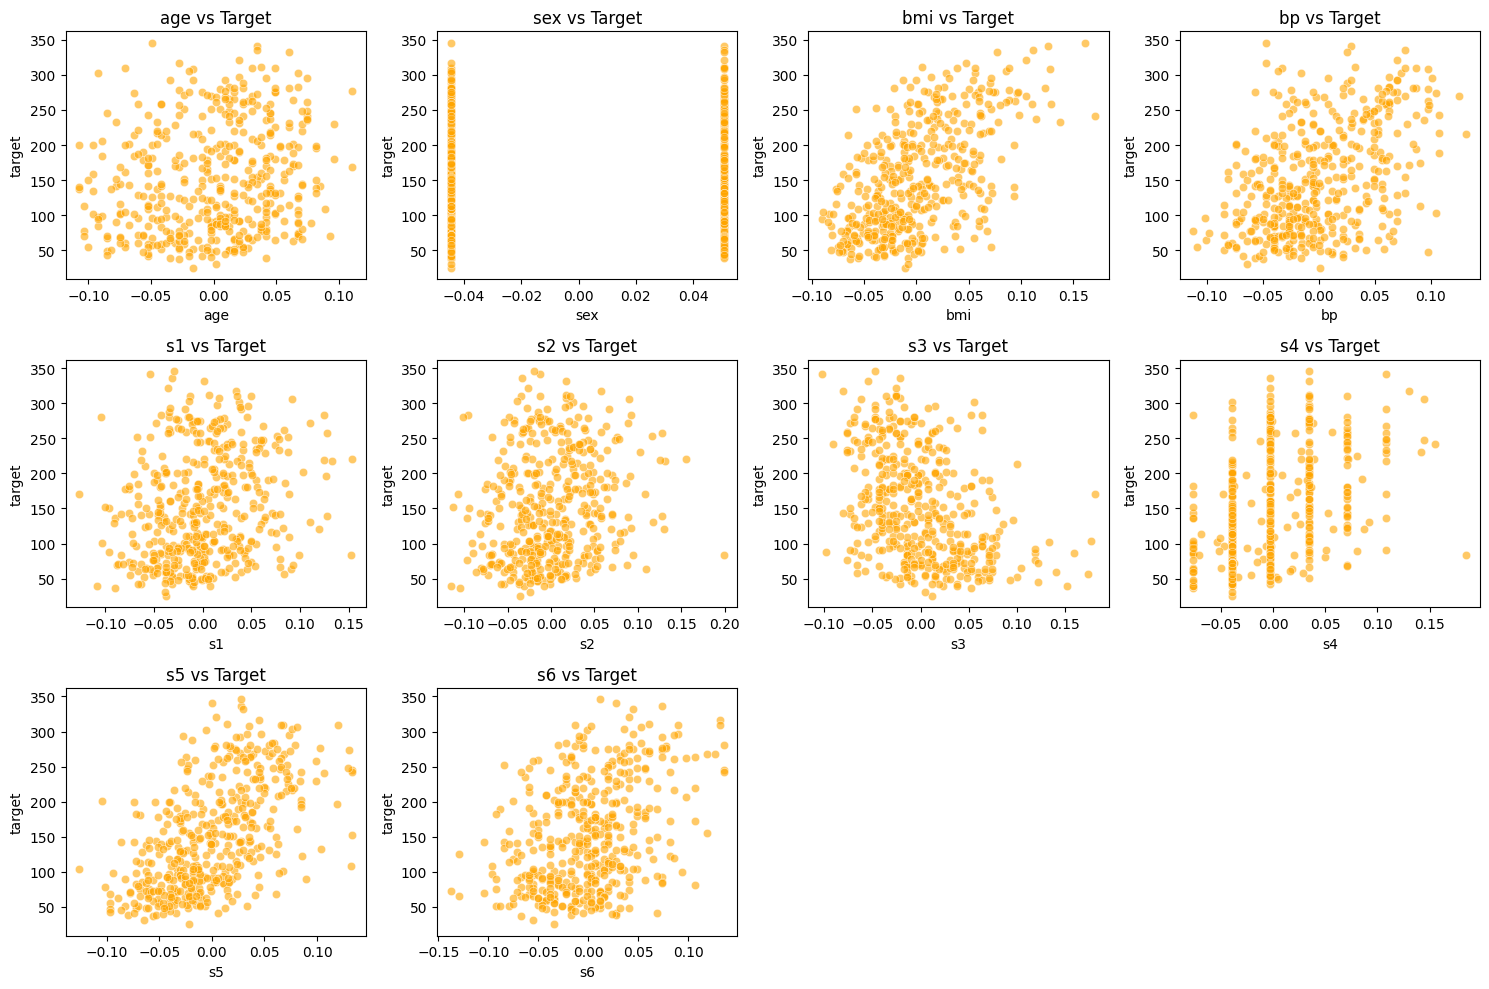

In [14]:



# Task 2.2: Scatter plots and box plots vs target
plt.figure(figsize=(15, 10))
for i, col in enumerate(feature_cols):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=df[col], y=df["target"], color="orange", alpha=0.6)
    plt.title(f"{col} vs Target")
plt.tight_layout()
plt.show()


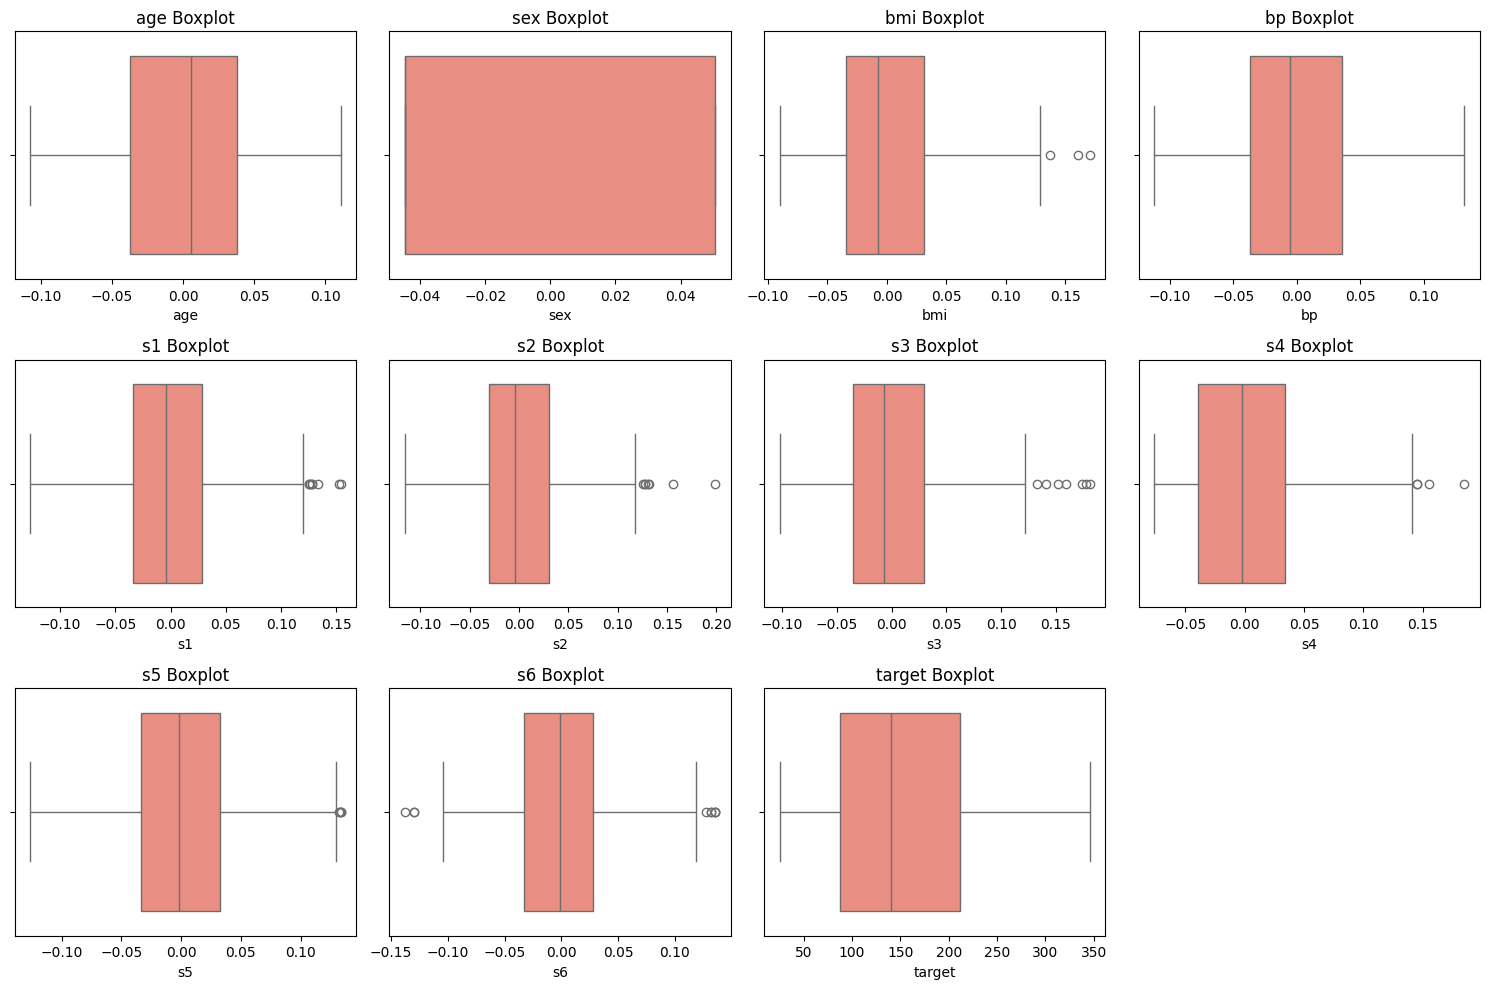

In [15]:
# Box plots to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=df[col], color="salmon")
    plt.title(f"{col} Boxplot")
plt.tight_layout()
plt.show()

In [16]:

# Task 2.3: Identify outliers using IQR method
outlier_counts = {}
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_counts[col] = len(outliers)

print("\nOutlier counts per column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")



Outlier counts per column:
age: 0
sex: 0
bmi: 3
bp: 0
s1: 8
s2: 7
s3: 7
s4: 4
s5: 4
s6: 9
target: 0


In [17]:

# Use the cleaned dataset from Phase 2
df = df_clean.copy()


In [19]:
# -----------------------------
# Task 3.1: Create new features
# -----------------------------
# Example: BMI squared and age × BMI interaction
df["bmi_squared"] = df["bmi"] ** 2
df["age_bmi"] = df["age"] * df["bmi"]
print("✅ New features added: 'bmi_squared' and 'age_bmi'")


✅ New features added: 'bmi_squared' and 'age_bmi'


In [20]:

# -----------------------------
# Task 3.2: Encode categorical variables
# -----------------------------
# Check for categorical columns
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical columns found:", categorical_cols)


Categorical columns found: []


In [21]:
# Apply one-hot encoding if needed
if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols)
    print("✅ Categorical variables encoded using one-hot encoding")
else:
    print("✅ No categorical variables to encode")

✅ No categorical variables to encode


In [22]:
# -----------------------------
# Task 3.3: Normalize or standardize numerical features
# -----------------------------
# Standardize all features except the target
features = [col for col in df.columns if col != "target"]
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
print("✅ Numerical features standardized")

# Final check
print("\nPreprocessed dataset shape:", df.shape)
df.head()


✅ Numerical features standardized

Preprocessed dataset shape: (442, 13)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,bmi_squared,age_bmi
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,151.0,0.473132,0.852971
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,75.0,0.118633,-0.142222
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,141.0,-0.087804,1.490359
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,206.0,-0.652097,0.271279
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,135.0,-0.287621,-0.271571


In [24]:
# Phase 4: Model Training and Evaluation



# Use the preprocessed dataset from Phase 3
df = df.copy()

# -----------------------------
# Task 4.1: Split the dataset
# -----------------------------
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data split into training and testing sets")

✅ Data split into training and testing sets


In [25]:

# -----------------------------
# Task 4.2: Choose ML algorithms
# -----------------------------
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}
print("✅ Models selected")


✅ Models selected


In [27]:
# -----------------------------
# Task 4.3: Train and evaluate models
# -----------------------------


def evaluate_model(name, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = mse ** 0.5  # manually compute RMSE
    r2 = r2_score(y_test, preds)
    print(f"\n📊 {name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")
    return r2, model


best_score = -float("inf")
best_model = None
best_name = ""

for name, model in models.items():
    score, trained_model = evaluate_model(name, model)
    if score > best_score:
        best_score = score
        best_model = trained_model
        best_name = name


📊 Linear Regression Performance:
MAE: 42.62
RMSE: 53.52
R²: 0.46

📊 Decision Tree Performance:
MAE: 56.80
RMSE: 72.62
R²: 0.00

📊 Random Forest Performance:
MAE: 43.87
RMSE: 54.45
R²: 0.44

📊 Gradient Boosting Performance:
MAE: 43.14
RMSE: 53.39
R²: 0.46


In [28]:
# -----------------------------
# Task 4.4: Hyperparameter tuning (simple example)
# -----------------------------
if best_name == "Random Forest":
    param_grid = {
        "n_estimators": [50, 100],
        "max_depth": [None, 10, 20]
    }
    grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    print("✅ Random Forest tuned")

elif best_name == "Gradient Boosting":
    param_grid = {
        "n_estimators": [50, 100],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    }
    grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    print("✅ Gradient Boosting tuned")

✅ Gradient Boosting tuned


In [30]:

# Final predictions
final_preds = best_model.predict(X_test)

# Metrics
final_mae = mean_absolute_error(y_test, final_preds)
final_mse = mean_squared_error(y_test, final_preds)
final_rmse = final_mse ** 0.5  # manually compute RMSE
final_r2 = r2_score(y_test, final_preds)

# Print results
print(f"\n✅ Best Model: {best_name}")
print(f"Final MAE: {final_mae:.2f}")
print(f"Final RMSE: {final_rmse:.2f}")
print(f"Final R²: {final_r2:.2f}")

# Save model for Streamlit app
import joblib
joblib.dump(best_model, "best_model.pkl")
print("✅ Model saved as 'best_model.pkl' for use in Streamlit")




✅ Best Model: Gradient Boosting
Final MAE: 44.03
Final RMSE: 53.37
Final R²: 0.46
✅ Model saved as 'best_model.pkl' for use in Streamlit


In [31]:
# Phase 5: Model Interpretation and Reporting


# Use the trained best_model and feature set from Phase 4
# X_train was defined earlier, and best_model is already trained

# -----------------------------
# Task 5.1: Interpret model results
# -----------------------------
# For tree-based models, we can use feature_importances_
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    feature_names = X_train.columns
    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)
    print("✅ Feature importance extracted")
else:
    print("⚠️ Feature importance not available for this model")

✅ Feature importance extracted


C:\Users\USER\AppData\Local\Temp\ipykernel_12128\1923804361.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


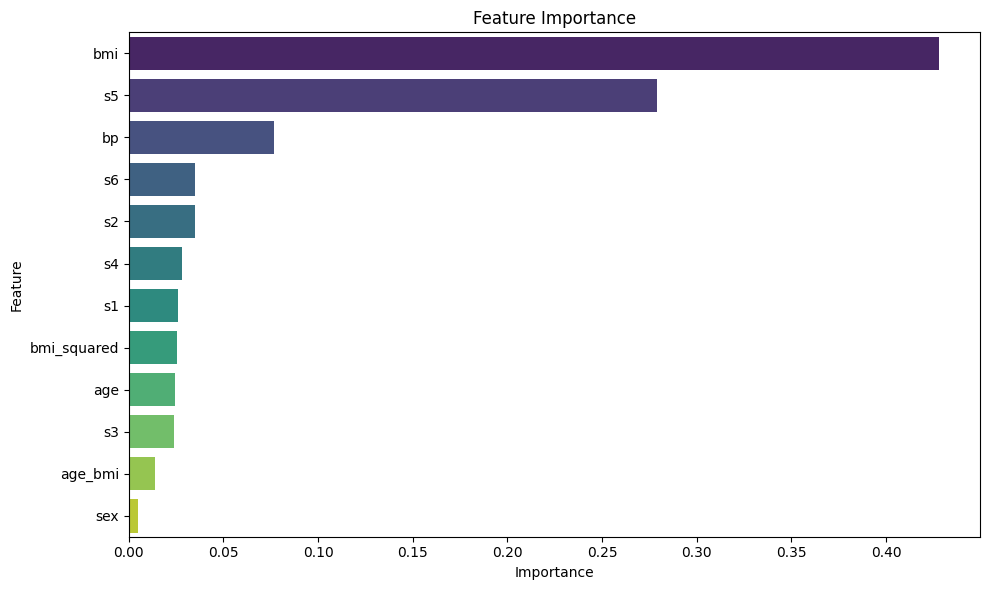

In [32]:
# -----------------------------
# Task 5.2: Visualize feature importance
# -----------------------------
if 'importance_df' in locals():
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
    plt.title("Feature Importance")
    plt.tight_layout()
    plt.show()


In [33]:
# -----------------------------
# Task 5.3: Write a summary report
# -----------------------------
print("\n📄 Project Summary Report")
print("--------------------------------------------------")
print("🔹 Objective: Predict diabetes progression using patient features")
print("🔹 Dataset: Cleaned and preprocessed diabetes dataset")
print("🔹 Models tested: Linear Regression, Decision Tree, Random Forest, Gradient Boosting")
print(f"🔹 Best model: {best_name}")
print(f"🔹 Final performance:")
print(f"    - MAE: {final_mae:.2f}")
print(f"    - RMSE: {final_rmse:.2f}")
print(f"    - R²: {final_r2:.2f}")
if 'importance_df' in locals():
    print("🔹 Top features:")
    print(importance_df.head(5).to_string(index=False))
print("--------------------------------------------------")



📄 Project Summary Report
--------------------------------------------------
🔹 Objective: Predict diabetes progression using patient features
🔹 Dataset: Cleaned and preprocessed diabetes dataset
🔹 Models tested: Linear Regression, Decision Tree, Random Forest, Gradient Boosting
🔹 Best model: Gradient Boosting
🔹 Final performance:
    - MAE: 44.03
    - RMSE: 53.37
    - R²: 0.46
🔹 Top features:
Feature  Importance
    bmi    0.428223
     s5    0.279224
     bp    0.076666
     s6    0.035022
     s2    0.034943
--------------------------------------------------
